In [1]:
from sklearn.model_selection import train_test_split
from wbn.classifier import WBN
from wbn.sample.datasets import load_pr_newswire

In [2]:
# Load dataset
pr_newswire = load_pr_newswire()

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
    pr_newswire.data, pr_newswire.target, test_size=0.2
)

In [3]:
# Build WBN
wbn = WBN()

# Fit WBN Model
wbn.fit(x_train, y_train)

[Classification(dag=<networkx.classes.digraph.DiGraph object at 0x10bab3310>, cls='bankruptcy', corpus=['process', 'expect', 'post', 'initi', 'effect', 'emerg', 'litig', 'financ', 'case', 'voluntarili', 'voluntari', 'restructur', 'cash', 'approv', 'success', 'declar', 'corpor', 'financi', 'recapit', 'announc', 'court', 'reduc', 'prepackag', 'complet', 'lead', 'fund', 'confirm', 'bankruptci', 'agreement', 'chapter', 'commenc', 'reorgan', 'debtor', 'access', 'proceed', 'possess', 'file', 'debt', 'statement', 'cours', 'term', 'bankrupt', '11', 'pursuant', 'exit', 'amend', 'receiv', 'balanc', 'protect', 'transact', 'note', 'enter', 'plan']),
 Classification(dag=<networkx.classes.digraph.DiGraph object at 0x10ba5b8e0>, cls='cash-dividend', corpus=['close', 'date', 'return', 'initi', 'trust', 'quarterli', 'reinvest', 'ex', 'paid', 'common', 'capit', 'dividend', 'cash', 'special', 'approv', 'record', 'declar', 'stock', 'pay', 'drip', 'regular', 'announc', 'payment', 'opt', 'busi', 'payabl', '

In [4]:
# Predict
pred = wbn.predict(x_test)

# Reverse encode classes
y_pred = wbn.reverse_encode(target=pred)

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    recall_score,
    precision_score,
)

In [6]:
c_matrix = confusion_matrix(y_test, y_pred)

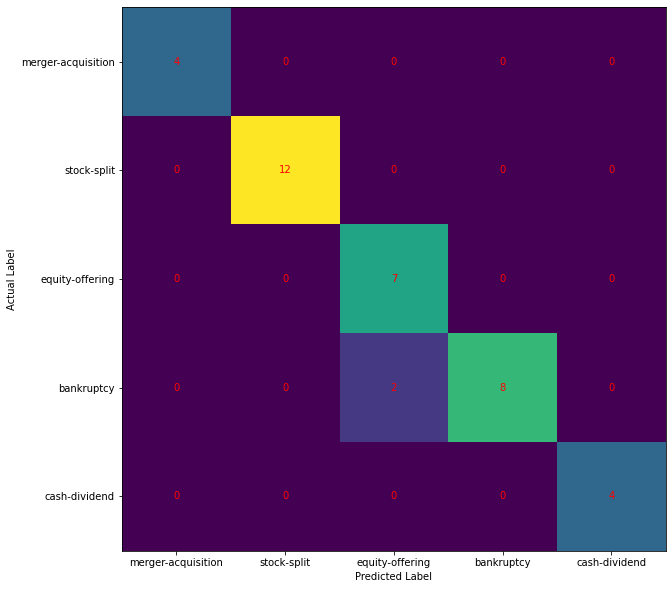

In [7]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(c_matrix)

ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
labels = tuple(wbn.reverse_encode([0, 1, 2, 3, 4]))
ax.xaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
ax.yaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
for i in range(len(labels)):  # ref: (https://realpython.com/logistic-regression-python/)
    for j in range(len(labels)):
        ax.text(j, i, c_matrix[i, j], ha='center', va='center', color='red')

In [8]:
# Calculate key metrics
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Accuracy Score: {accuracy}")

Precision Score: 0.9579579579579579
Recall Score: 0.9459459459459459
Accuracy Score: 0.9459459459459459
